## Part 5: Plotting Receiver Operating Characteristic Curve 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
y=np.array([1,1,0,1,1,0,1,1,0,0])
y_score=np.array([0.95, 0.85,0.8,0.7,0.55,0.45,0.4,0.3,0.2,0.1])

FPR points: [0.0, 0.25, 0.5, 1.0]
TPR points: [0.3333333333333333, 0.6666666666666666, 1.0, 1.0]


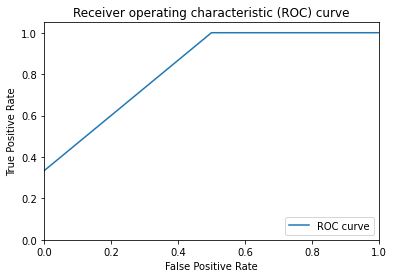

In [18]:
#Converted the algorithm given in lecture to code that displays the ROC Curve

def generate_roc_curve(y_true, y_score):
    # Sort the test-set instances according to predicted confidence
    sorted_indices = np.argsort(y_score)[::-1]
    y_true_sorted = y_true[sorted_indices]
    
    # Find the number of positive and negative instances in the test set
    num_neg = (y_true_sorted == 0).sum()
    num_pos = (y_true_sorted == 1).sum()
    
    # Initialize variables
    TP = 0
    FP = 0
    last_TP = 0
    fpr_coordinates = []
    tpr_coordinates = []
    # Loop over the test set instances
    for i in range(len(y_score)):
        # Find thresholds where there is a pos instance on high side, neg instance on low side
        if i > 0 and y_score[sorted_indices[i]] != y_score[sorted_indices[i-1]] and y_true_sorted[i] == 0 and TP > last_TP:
            FPR = FP / num_neg
            TPR = TP / num_pos
            fpr_coordinates.append(FPR)
            tpr_coordinates.append(TPR)
            last_TP = TP
        if y_true_sorted[i] == 1:
            TP += 1
        else:
            FP += 1
    
    # Add the last point to the ROC curve
    FPR = FP / num_neg
    TPR = TP / num_pos
    fpr_coordinates.append(FPR)
    tpr_coordinates.append(TPR)

    print("FPR points:",fpr_coordinates)
    print("TPR points:",tpr_coordinates)

    plt.plot(fpr_coordinates, tpr_coordinates, label='ROC curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()

generate_roc_curve(y,y_score)